In [1]:
import numpy as np
from landlab import RasterModelGrid, HexModelGrid
from landlab.components import StreamPowerEroder, LinearDiffuser, FlowAccumulator
from landlab import imshow_grid
from matplotlib import pyplot as plt

In [2]:
number_of_rows = 200            
number_of_columns = 200        
dxy = 100                        

In [3]:
mg = RasterModelGrid((number_of_rows, number_of_columns), dxy)

# Create random noise
np.random.seed(0)                                       # seed set to zero so our figures are reproducible
mg_noise = np.random.rand(mg.number_of_nodes)/1000.     # intial noise on elevation grid

# set up the elevation on the grid
zr = mg.add_zeros('node', 'topographic__elevation')
zr += mg_noise

In [4]:
East = 1
North = 1
West = 1
South = 1

In [5]:
East = 4
North = 4
West = 4

In [6]:
mg.set_status_at_node_on_edges(right=East, top=North, left=West, bottom=South)

In [7]:
U = 1E-3

In [8]:
uplift_rate = np.ones(mg.number_of_nodes)*U

## One-time uplift event
#fault_location = 10000  # [m] (original value = 4000)
#uplift_amount = 100 # [m] (original value = 10)
#zr[np.where(mg.node_y>fault_location)] += uplift_amount 

# Continuously-slipping fault, 
fault_location = 10000  # [m] (Original value = 4000)
low_uplift_rate = 1E-3 # [m/yr] (Original value = 0.0001)
high_uplift_rate = 1E-2 # [m/yr] (Original value = 0.0004)
uplift_rate[np.where(mg.node_y<fault_location)] = low_uplift_rate
uplift_rate[np.where(mg.node_y>fault_location)] = high_uplift_rate

## Uplift Gradient
#low_uplift_rate = 0.0001 # [m/yr]
#high_uplift_rate = 0.004 # [m/yr]
#uplift_rate_gradient = (high_uplift_rate - low_uplift_rate)/(number_of_rows-3)
#uplift_rate = low_uplift_rate + ((mg.node_y / dxy)-1) * uplift_rate_gradient


In [9]:
dt = 1000            # time step [yr]
tmax = 1E5        # time for the model loop to run [yr]

In [10]:
total_time = 0 
t = np.arange(0, tmax, dt)
qs = np.zeros(len(t))
num = 0

In [11]:
min_drainage_area = 1000
K_hs = 1E-3
K_sp = 1E-4
m_sp = 0.5                  # exponent on drainage area in stream power equation 
n_sp = 1                    # exponent on slope in stream power equation

In [12]:
frr = FlowAccumulator(mg) 
spr = StreamPowerEroder(mg, K_sp=K_sp, m_sp=m_sp, n_sp=n_sp, threshold_sp=0.0)
dfn = LinearDiffuser(mg, linear_diffusivity=K_hs, deposit = False)

In [13]:
for ti in t:
    zr[mg.core_nodes] += uplift_rate[mg.core_nodes]*dt  # uplift the landscape
    Topo1 = np.copy(zr)
    dfn.run_one_step(dt)                                # diffuse the landscape
    frr.run_one_step()                                  # route flow
    spr.run_one_step(dt)                                # fluvial incision
    Topo2 = np.copy(zr)
    qs[num] = np.sum(Topo1-Topo2)*dxy*dxy/dt
    total_time += dt                                    # update time keeper
    num += 1
    print(total_time)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000


C:\Users\huxia\Anaconda3\envs\landlab_notebooks\lib\site-packages\landlab\plot\imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("terrain"))
  cmap.set_bad(color=color_for_closed)
C:\Users\huxia\Anaconda3\envs\landlab_notebooks\lib\site-packages\landlab\plot\imshow.py:307: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(norm=norm, shrink=shrink)


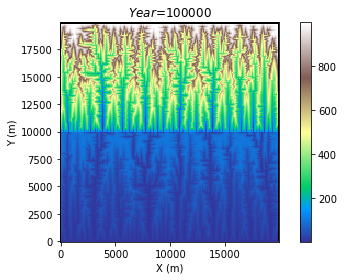

In [14]:
imshow_grid(mg, 'topographic__elevation', grid_units=('m', 'm'), cmap='terrain', allow_colorbar=True)
title_text = '$Year$='+str(total_time)  
plt.title(title_text)
plt.tight_layout()
plt.show()

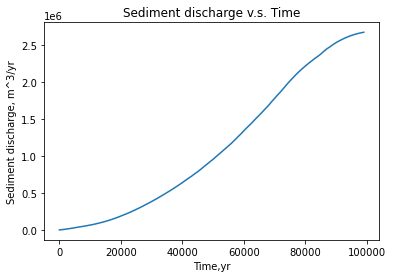

In [15]:
plt.plot(t,qs)
plt.title('Sediment discharge v.s. Time')
plt.xlabel('Time,yr')
plt.ylabel('Sediment discharge, m^3/yr')
plt.show()